## Aman P - Final - CNN - mnist


## Implement the Image classification CNN modelfor classifying hand-written MNISTdataset by dividing the model into following 4 stages:
    a. Loadingand preprocessingtheimagedata
    b. Definingthemodel'sarchitecture
    c. Trainingthe model
    d. Estimatingthemodel'sperformance 

In [38]:
from tensorflow.keras.datasets import mnist

In [54]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load the data from CSV files
train_data = pd.read_csv('mnist_train.csv')
test_data = pd.read_csv('mnist_test.csv')

# Separate features and labels
X_train = train_data.drop('label', axis=1).values
y_train = train_data['label'].values

X_test = test_data.drop('label', axis=1).values
y_test = test_data['label'].values

# Reshape the data to (num_samples, 28, 28, 1) for convolutional network
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Flatten the labels
y_train = y_train.flatten()
y_test = y_test.flatten()

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [55]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense

In [56]:
model = Sequential([
    Conv2D(128,(3,3),activation = 'relu',input_shape=(28,28,1)),
    MaxPool2D((2,2)),
    Conv2D(64,(3,3),activation = 'relu'),
    MaxPool2D((2,2)),
    Conv2D(32,(3,3),activation = 'relu'),
    MaxPool2D((2,2)),
    Flatten(),
    Dense(32,activation = 'relu'),
    Dense(10,activation = 'softmax')    
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 26, 26, 128)       1280      
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 13, 13, 128)       0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 11, 11, 64)        73792     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 5, 5, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_20 (Conv2D)          (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 1, 1, 32)         

In [57]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(optimizer='adam',loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [58]:
epochs = 2
H  = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=epochs)

Epoch 1/2
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3053 - accuracy: 0.9029 - val_loss: 0.1046 - val_accuracy: 0.9691
Epoch 2/2
1500/1500 [==============================] - 17s 11ms/step - loss: 0.1102 - accuracy: 0.9679 - val_loss: 0.0922 - val_accuracy: 0.9728


In [59]:
from sklearn.metrics import classification_report
prediction = model.predict(X_test)
print(classification_report(y_test,prediction.argmax(axis=1)))

313/313 [==============================] - 2s 6ms/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.98      0.99      0.99      1135
           2       0.97      0.96      0.97      1032
           3       0.95      0.99      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.99      0.94      0.96       892
           6       0.96      0.99      0.97       958
           7       0.97      0.95      0.96      1028
           8       0.95      0.98      0.96       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



313/313 [==============================] - 2s 5ms/step
Actual no: 7 Predicted no: 7


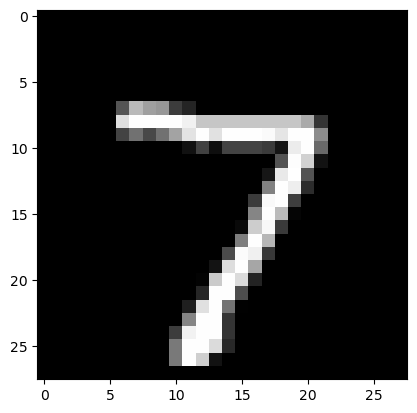

Actual no: 2 Predicted no: 2


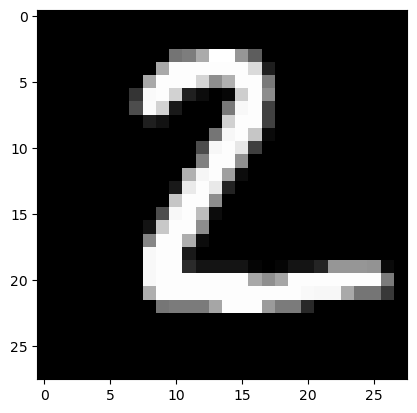

Actual no: 1 Predicted no: 1


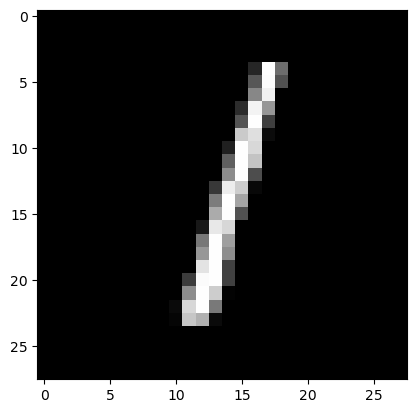

Actual no: 0 Predicted no: 0


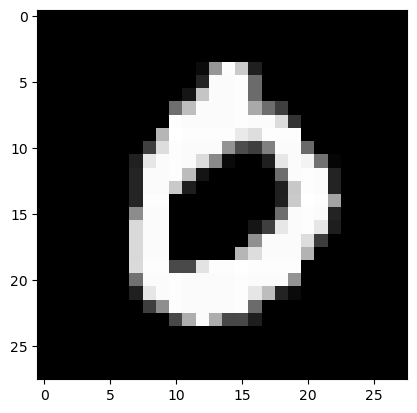

Actual no: 4 Predicted no: 4


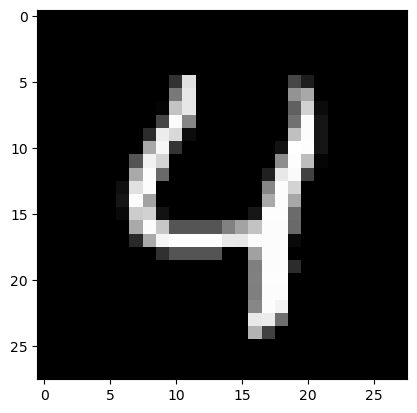

Actual no: 1 Predicted no: 1


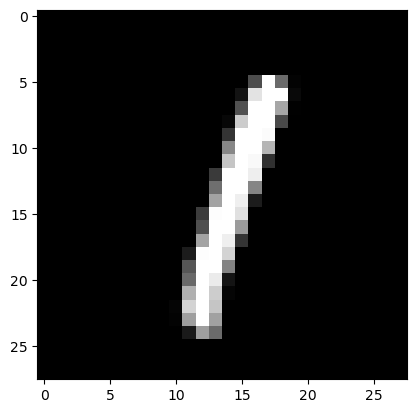

Actual no: 4 Predicted no: 4


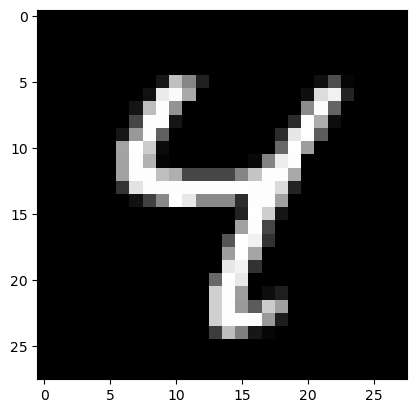

Actual no: 9 Predicted no: 9


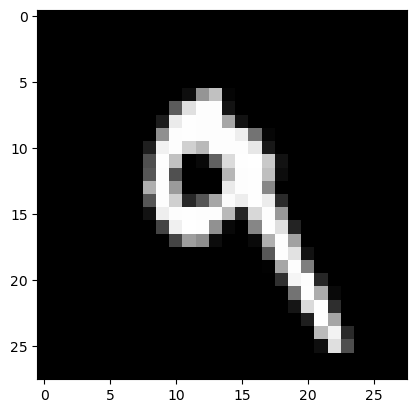

Actual no: 5 Predicted no: 6


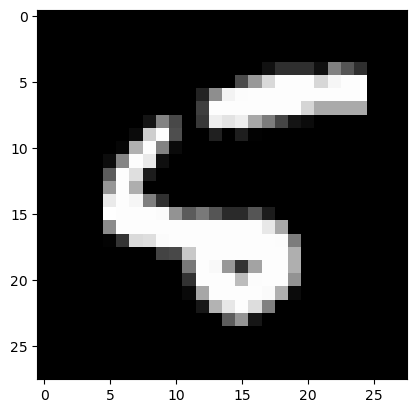

Actual no: 9 Predicted no: 9


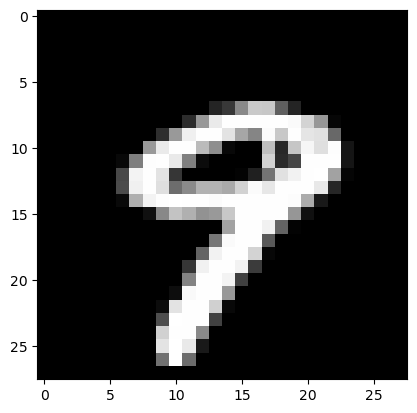

In [60]:
# Function to display actual and predicted numbers with images
import matplotlib.pyplot as plt
import numpy as np
predictions = model.predict(X_test)

def display_actual_vs_predicted(n):
    actual_number = y_test[n]
    predicted_number = np.argmax(predictions[n])

    plt.imshow(X_test[n].reshape(28,28), cmap='gray')
    print("Actual no:", actual_number,"Predicted no:",predicted_number)
    plt.show()

# Display a few examples
for i in range(10):
    display_actual_vs_predicted(i)


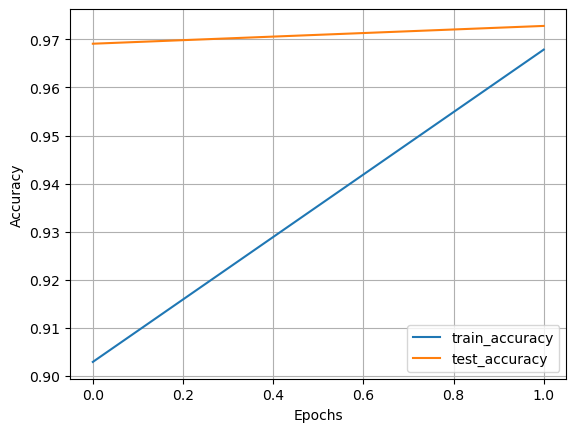

In [61]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['accuracy'],label = 'train_accuracy')
plt.plot(range(0,epochs),H.history['val_accuracy'],label = 'test_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

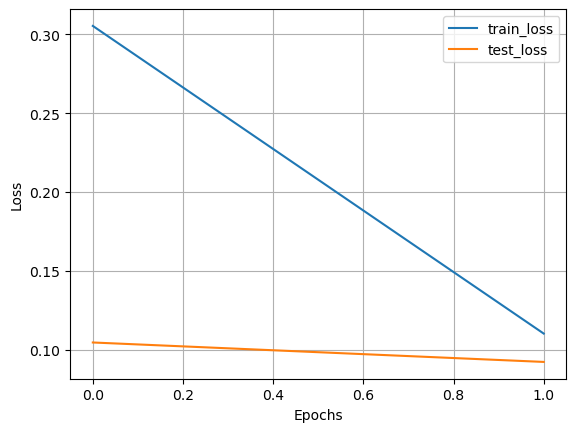

In [62]:
import matplotlib.pyplot as plt
plt.plot(range(0,epochs),H.history['loss'],label = 'train_loss')
plt.plot(range(0,epochs),H.history['val_loss'],label = 'test_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid();